# Project # 2

Houses Cost in Boston 1970-1980

## Load the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
plt.rcParams["figure.figsize"] = 12, 8

In [3]:
boston = pd.read_csv('../data/BostonHousing.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
features = boston.iloc[:, :-1]
target = boston['medv']

## Required part

### 1. Linear model

Постройте полную линейную модель, предварительно применив
стандартизацию предикторов. В модели не надо учитывать взаимодействия
предикторов.

In [14]:
# standartisation

means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds
scaled_features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [15]:
X = sm.add_constant(scaled_features)
model = sm.OLS(target, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        13:07:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

### 2. Model diagnostic

Проведите диагностику данной модели:   
а. Проверка линейности взаимосвязи     
б. Проверка влиятельных наблюдений   
в. Независимость наблюдений   
г. Нормальность распределения и постоянство дисперсии

#### a. Check the linearity of relationship

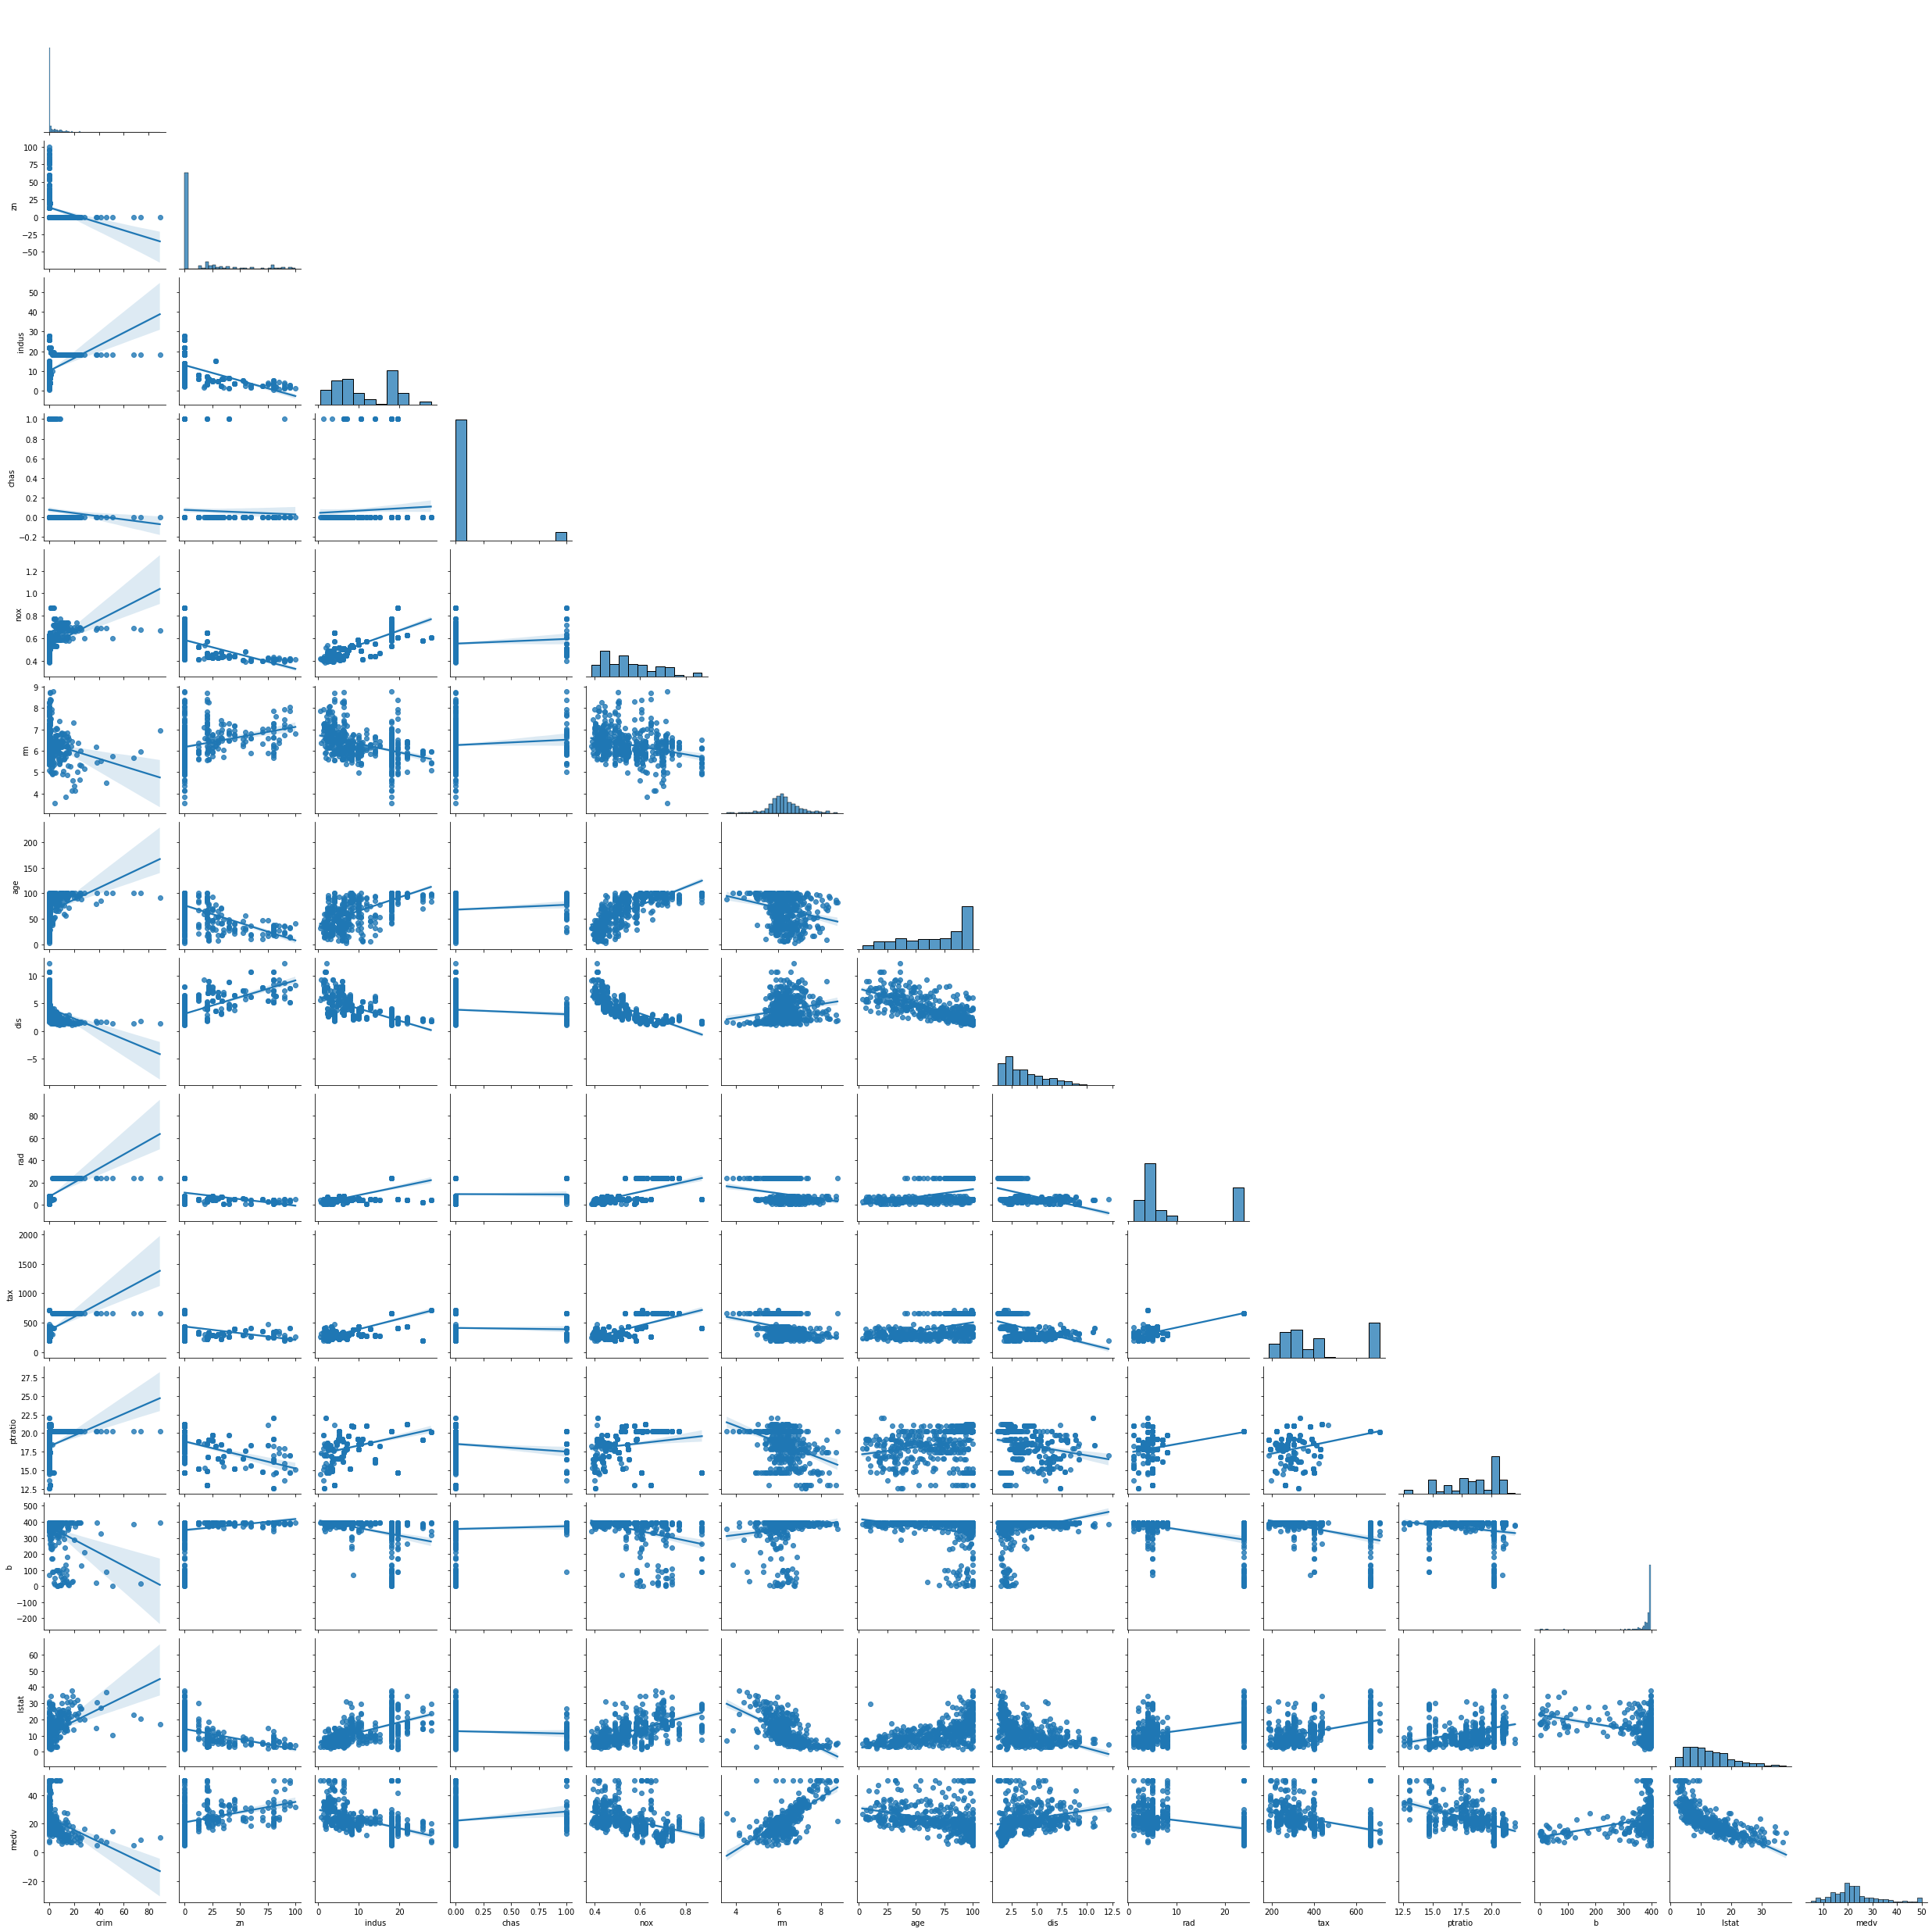

In [34]:
sns.pairplot(boston, kind='reg', corner=True)
# too big image to see and meditate on it, so I saved it to file
plt.savefig('../figures/pairplot_all_vars.png')

#### b. Check the influential observations

In [23]:
influence = results.get_influence()
cooks = influence.cooks_distance
cooks

(array([2.00241182e-03, 4.22857395e-04, 6.55853503e-04, 1.18058057e-03,
        3.59851425e-03, 5.74194665e-04, 4.72546845e-07, 5.82635409e-03,
        4.62994000e-03, 4.01383186e-08, 1.92640255e-03, 5.67459552e-04,
        3.62408248e-05, 3.22586961e-05, 5.58811130e-05, 1.65626094e-05,
        4.91207261e-04, 1.32490825e-05, 1.27398506e-03, 1.69581259e-06,
        6.97222384e-05, 1.60947828e-04, 2.07796361e-05, 2.90688609e-05,
        3.11014124e-07, 1.38389141e-05, 6.48388494e-05, 4.41362303e-07,
        7.33485688e-05, 7.62795999e-07, 9.89547175e-05, 7.46407072e-04,
        2.28054439e-03, 7.20316848e-05, 3.22115187e-06, 7.68854322e-04,
        1.71832946e-04, 1.67793317e-04, 1.60591201e-04, 3.26965825e-05,
        5.21299660e-05, 1.81626540e-04, 7.02029486e-07, 6.26114010e-07,
        1.07290360e-04, 3.36163087e-04, 8.50425200e-06, 1.50051230e-04,
        4.98762064e-03, 2.55758721e-04, 1.04455561e-04, 6.00527884e-04,
        2.93524386e-04, 1.88430383e-05, 2.23822707e-03, 2.205784

In [21]:
(cooks[1] < 0.05).sum()

0

There is no significant observation outliers in our model.

#### c. Independence of observations

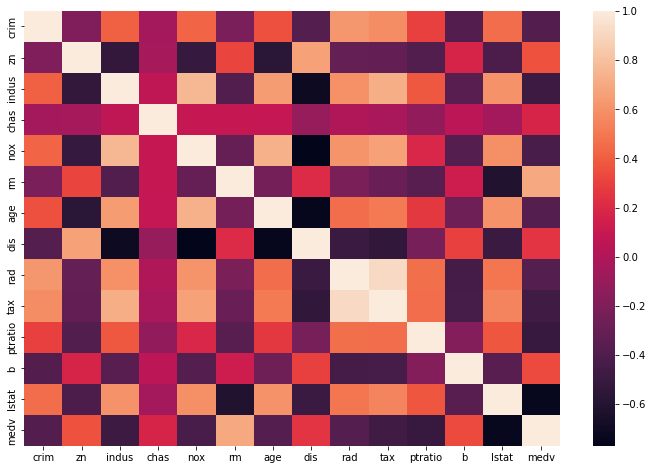

In [36]:
sns.heatmap(boston.corr());

In [46]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### d. Normality of distribution and constancy of variance

In [29]:
prediction_result = results.get_prediction(X)
target_pred = prediction_result.predicted_mean
resid_full = target - target_pred

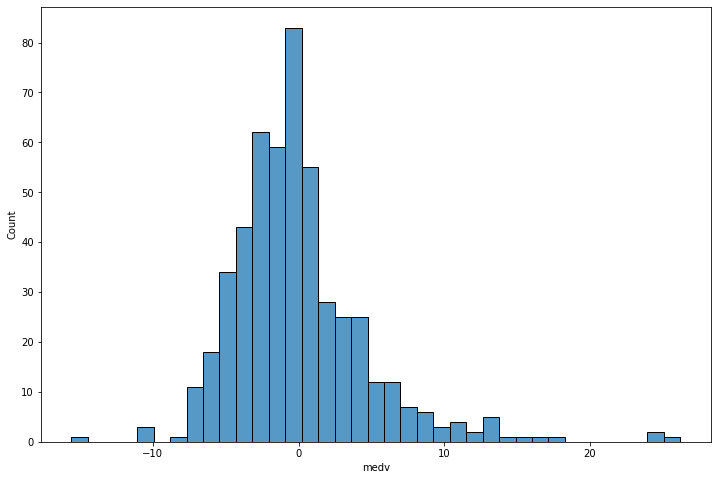

In [32]:
sns.histplot(resid_full);

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


### 3. Prediction plot

Постройте график предсказаний стоимости от переменной, которая обладает
наибольшим по модулю коэффициентом.

<AxesSubplot:ylabel='lstat'>

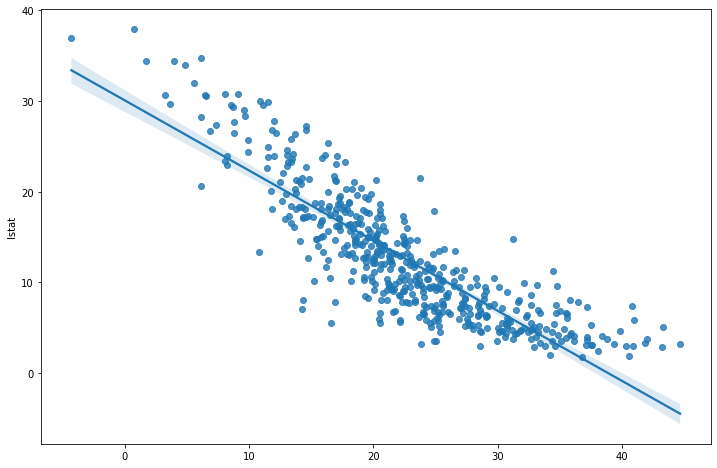

In [78]:
sns.regplot(x=target_pred, y=boston['lstat'])

## Discussion

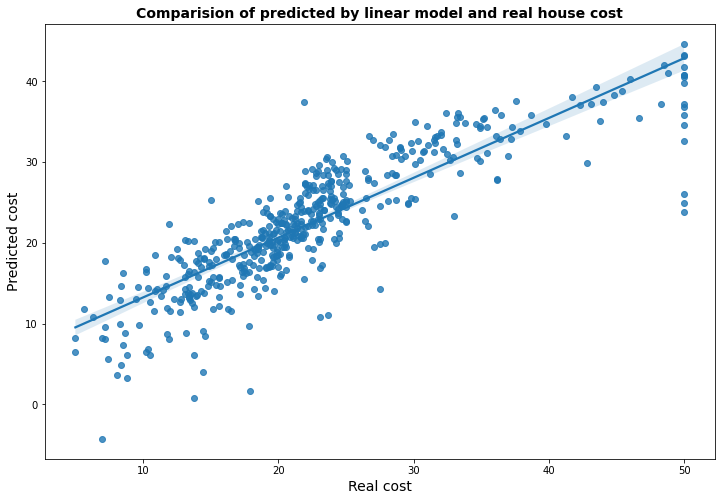

In [88]:
sns.regplot(x=target, y=target_pred)
plt.title('Comparision of predicted by linear model and real house cost', size=14, weight='bold')
plt.xlabel('Real cost', size=14)
plt.ylabel('Predicted cost', size=14);

It is not a good model at all.
1) The data contains variables that characterising as factors and takes values 0 or 1 (chas) or with bimodal distribution (rad, tax). So maybe we would need to build separate models for these factors.
2) As we've seen at pairplot, some variables contains values that seems like outliers (crim).
3) Also some variables have a strong correlations (i.e. dis - indus, nox, age; tax - rad; lstat - rm etc). For building a correct model we would need to try to exclude some variables and see changes in models.
4) Distribution of residues seems close to normal distribution but it has a small bias and some outliers.
5) VIF shows that some variables may be explained by other variables, so as in case of correlations we would need to try to exclude this variables.

But it's a good model for prediction, because predicted values seems legit in comparision with real values (as shown on scatter plot with linear regression line).